# Practice 2: Linear Regression

In [1]:
import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_csv(file_name):
    values = read_csv(file_name,header=None).values
    return values.astype(float)

## Linear Regression with one variable

In [3]:
data = load_csv("data/ex1data1.csv")

In [4]:
X = data[:,:-1] # Features
Y = data[:, -1] # Target

In [5]:
print("#" * 50)
print(data[:5])
print("#" * 50)
print(X[:5])
print("#" * 50)
print(Y[:5])

##################################################
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
##################################################
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
##################################################
[17.592   9.1302 13.662  11.854   6.8233]


In [6]:
m = np.shape(X)[0] # Number of training examples

In [7]:
def h(th0, th1, x):
    return th0 + th1 * x

def cost_one_variable(X, Y, th0, th1):
    ac_0, ac_1 = 0, 0 
    for i in range(len(X)):
        ac_0 += (h(th0, th1, X[i]) - Y[i])
        ac_1 +=  (h(th0, th1, X[i]) - Y[i]) * X[i]
        
    return (ac_0,ac_1)

def gradient_descent_one_variable(X, Y, alpha = 0.01):
    th0 = 0
    th1 = 0
    
    for i in range(1500):
        tmp_th0 =  th0 - alpha * cost_one_variable(X,Y,th0,th1)[0] / len(X)
        tmp_th1 =  th1 - alpha * cost_one_variable(X,Y,th0,th1)[1] / len(X)
        th0 = tmp_th0
        th1 = tmp_th1
        
    return (th0, th1)

Aplicamos el método descenso de gradiento a nuestros datos de entrada X e Y. Tras ello dibujamos la gráfica:

In [8]:
result = gradient_descent_one_variable(X,Y)
result

(array([-3.63029144]), array([1.16636235]))

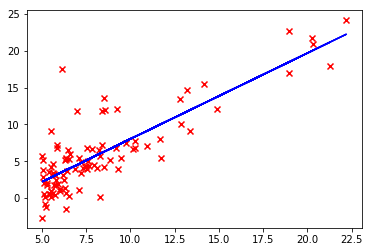

In [9]:
result = gradient_descent_one_variable(X,Y)
array_y = []
for i in X:
    array_y.append(h(result[0],result[1],i))

plt.scatter(data[:,0], data[:,1], marker= "x", color="red")
    
plt.plot(X, array_y ,color ="blue")

In [10]:
def coste_multiple_variables(X, Y, Theta):
    H = np.dot(X,Theta)
    Aux = (H-Y) **2
    return Aux.sum()/(2*len(X))

In [11]:
X=np.hstack([np.ones([m,1]), X])

A continuación se generan gráficas para mostrar la evolución del coste durante el proceso Gradiente descendente

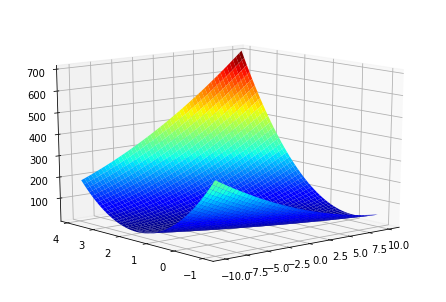

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=15, azim=230)
Theta0 = np.arange(-10,10,0.1)
Theta1 = np.arange(-1,4,0.1)
Theta0, Theta1 = np.meshgrid(Theta0, Theta1)

Coste = np.empty_like(Theta0)

for ix, iy in  np.ndindex(Theta0.shape):
    Coste[ix, iy] = coste_multiple_variables(X,Y,[Theta0[ix,iy], Theta1[ix,iy]])


surf = ax.plot_surface(Theta0,Theta1,Coste, cmap=cm.jet)

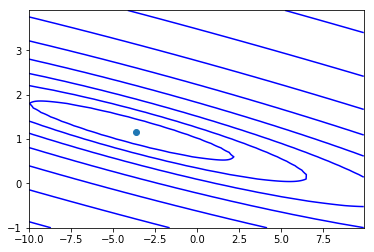

In [13]:
plt.contour(Theta0, Theta1, Coste,
           np.logspace(-2,3,20),colors='blue')
plt.scatter(result[0],result[1])

### Regresión con mútiples variables

In [14]:
data_multiple_variables = load_csv("data/ex1data2.csv")

In [15]:
X = data_multiple_variables[:,:-1] # Features
Y = data_multiple_variables[:, -1] # Target

In [16]:
print("#" * 50)
print(data_multiple_variables[:5])
print("#" * 50)
print(X[:5])
print("#" * 50)
print(Y[:5])

##################################################
[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]
##################################################
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
##################################################
[399900. 329900. 369000. 232000. 539900.]


In [17]:
def normaliza(X):
    medias = np.mean(X,axis=0)
    sigmas = np.std(X,axis=0)
    
    X_normalizada = X / (medias - sigmas)
    
    return (X_normalizada, medias, sigmas)

In [18]:
X_norm, x_medias, x_sigmas = normaliza(X)
Y_norm = normaliza(Y)[0]
m = np.shape(X)[0] # Number of training examples
X_norm =np.hstack([np.ones([m,1]),X_norm])

In [19]:
print("#" * 50)
print(X[:5])
print("#" * 50)
print(X_norm[:5])

##################################################
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]
##################################################
[[1.         1.73243122 1.24101815]
 [1.         1.31743819 1.24101815]
 [1.         1.97615728 1.24101815]
 [1.         1.1659328  0.82734544]
 [1.         2.4701966  1.65469087]]


In [20]:
m = np.shape(X_norm)[0]
n = np.shape(X_norm)[1]

In [21]:
def gradient_descent_multiple_variables(X, Y, alpha = 0.01, iterations = 100000):
    
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    costs =   []
    
    Thetas = np.ones(n)
    
    NuevaTheta = Thetas
    
    for it in range(iterations):
        H = np.dot(X, NuevaTheta)    
        Aux = (H - Y)
        
        costs.append((1/2)* m *np.sum(Aux**2))
        
        for i in range(n):
            Aux_i = Aux * X[:, i]
            NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
            
    return (NuevaTheta,costs)
   

In [22]:
result = gradient_descent_multiple_variables(X_norm,Y)

### Pintamos la de una variable con la formula genérica

In [23]:
X_one_variable = data[:,:-1] # Features
Y_one_variable = data[:, -1] # Target
m = np.shape(X_one_variable)[0] # Number of training examples
X_one_variable=np.hstack([np.ones([m,1]),X_one_variable])
result = gradient_descent_multiple_variables(X_one_variable,Y_one_variable)
result[0]

array([-3.89578088,  1.19303364])

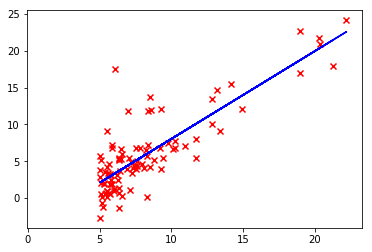

In [24]:
array_y = []
for i in X_one_variable:
    array_y.append(h(result[0][0],result[0][1],i))

plt.scatter(data[:,0], data[:,1], marker= "x", color="red")
    
plt.plot(X_one_variable, array_y ,color ="blue")

Podemos comprobar que las gráficas son iguales

### Gráfica Coste en función del alpha
Hemos reducido el número de iteraciones para comprobar de manera más visual cómo el coste disminuye por cada iteración:  

+ Como podemos comprobar, el coste disminuye con el paso de las iteraciones, por lo que la elección que hemos tomado a la hora de elegir el coeficiente de alpha es correcto.

+ Si alpha fuese muy pequeño, el coste se reduciría en muy pequeña cantidad en cada iteración y sería necesario aumentar el número de iteraciones para alcanzar la convergencia

+ Si, por el contrario, hubiésemos elegido un alpha mucho más grande, el coste no llegaría nunca al mínimo (que en nuestro caso ronda 0).
 


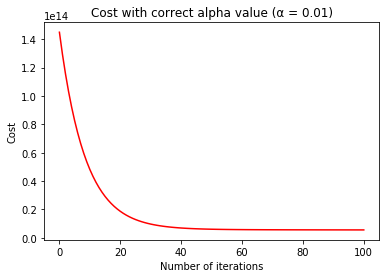

In [25]:
iters = 100

iterations = np.linspace(0, iters, iters, dtype=int) # X axis for plots

results_correct_alpha = gradient_descent_multiple_variables(X_norm, Y, iterations=iters) # results[1] is the costs vector

plt.title("Cost with correct alpha value (α = 0.01)")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.plot(iterations, results_correct_alpha[1], color="red")

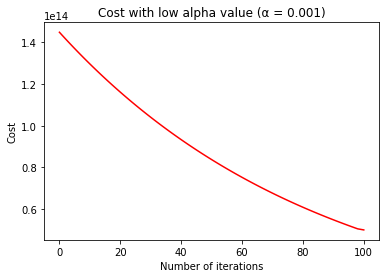

In [26]:
plt.title("Cost with low alpha value (α = 0.001)")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
results_low_alpha = gradient_descent_multiple_variables(X_norm, Y, iterations=iters, alpha=0.001)
plt.plot(iterations, results_low_alpha[1], color="red")

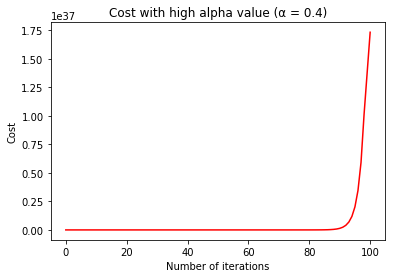

In [27]:
plt.title("Cost with high alpha value (α = 0.4)")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
results_high_alpha = gradient_descent_multiple_variables(X_norm, Y, iterations=iters, alpha=0.4)
plt.plot(iterations, results_high_alpha[1], color="red")

### Cálculo con la ecuación normal

In [28]:
def normal(X, Y):
    x_transpose = np.transpose(X)
    x_transpose_dot_x = x_transpose.dot(X)
    term_1 = np.linalg.pinv(x_transpose_dot_x)
    term_2 = x_transpose.dot(Y)
    return term_1.dot(term_2)

### Comparativa Descenso gradiente y Ecuación normal

In [29]:
m = np.shape(X)[0]
X =np.hstack([np.ones([m,1]),X])

In [30]:
normal_result = normal(X,Y)
gradient_result = gradient_descent_multiple_variables(X_norm,Y)
gradient_result[0]

array([ 89597.90954278, 169068.33330111, -21123.0248849 ])

In [31]:
normal_result

array([89597.90954435,   139.21067402, -8738.01911278])

In [32]:
pred_normal = normal_result[0] + normal_result[1] * 1650  + normal_result[2] * 3
pred_gradient = gradient_result[0][0] +  gradient_result[0][1] * (1650 / (x_medias[0] - x_sigmas[0])) + gradient_result[0][2] * (3 / (x_medias[1] - x_sigmas[1]))

In [33]:
print("Para un piso con 3 habitaciones y una superficie de 1650 m² es:")
print("Ecuación Normal: {}".format(pred_normal))
print("Método Descenso de Gradiente {}".format(pred_gradient))


Para un piso con 3 habitaciones y una superficie de 1650 m² es:
Ecuación Normal: 293081.4643350595
Método Descenso de Gradiente 293081.46433489566
